In [258]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [259]:
data_path='../data/smartwatches.csv'
df=pd.read_csv(data_path)
df.drop_duplicates(inplace=True) 
# train_df=df.sample(frac=0.8, random_state=42)
# test_df=df.drop(train_df.index)
# train_df=train_df.reset_index()
# test_df=test_df.reset_index()

In [260]:
train_df= df.copy()

In [261]:
df.shape, train_df.shape

((450, 16), (450, 16))

In [262]:
train_df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [263]:
train_df.drop([ 'Unnamed: 0'], axis=1, inplace=True)

In [264]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [265]:
train_df['Display Size'].isna().sum()

np.int64(30)

In [266]:
train_df['Display Size'].fillna('0.0 inches', inplace=True)

C:\Users\menur\AppData\Local\Temp\ipykernel_18172\2982374164.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].fillna('0.0 inches', inplace=True)


In [267]:
train_df['Display Size'].isna().sum()

np.int64(0)

In [268]:
train_df['Display Size']=train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [269]:
train_df['Display Size'].head()

0    0.0
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

In [270]:
train_df['Display Size'].replace(0.0, np.nan, inplace=True)

C:\Users\menur\AppData\Local\Temp\ipykernel_18172\1243258204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Display Size'].replace(0.0, np.nan, inplace=True)


In [271]:
train_df['Display Size'].isna().sum()

np.int64(31)

In [272]:
train_df['Display Size'].head()

0    NaN
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

In [273]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [274]:
re.findall('\d+', '20 - 35 g')

['20', '35']

In [275]:
cal= sum([int(x) for x in re.findall('\d+', '20 - 35 g')]) / 2 
train_df['Weight'].replace('20 - 35 g', cal , inplace=True)

C:\Users\menur\AppData\Local\Temp\ipykernel_18172\623645248.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('20 - 35 g', cal , inplace=True)


In [276]:
train_df['Weight'].value_counts()

Weight
27.5         80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [277]:
cal= sum([int(x) for x in re.findall('\d+', '35 - 50 g')]) / 2 
train_df['Weight'].replace('35 - 50 g', cal , inplace=True)

C:\Users\menur\AppData\Local\Temp\ipykernel_18172\141097266.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('35 - 50 g', cal , inplace=True)


In [278]:
cal= sum([int(x) for x in re.findall('\d+', '50 - 75 g')]) / 2 
train_df['Weight'].replace('50 - 75 g', cal , inplace=True)

C:\Users\menur\AppData\Local\Temp\ipykernel_18172\2233987352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('50 - 75 g', cal , inplace=True)


In [279]:
train_df['Weight'].replace('75g +', float(re.findall('\d+', '75g +')[0]), inplace=True)

C:\Users\menur\AppData\Local\Temp\ipykernel_18172\3271034506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('75g +', float(re.findall('\d+', '75g +')[0]), inplace=True)


In [280]:
train_df['Weight'].replace('<= 20 g', float(re.findall('\d+', '<= 20 g')[0]), inplace=True)

C:\Users\menur\AppData\Local\Temp\ipykernel_18172\1289372860.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Weight'].replace('<= 20 g', float(re.findall('\d+', '<= 20 g')[0]), inplace=True)
C:\Users\menur\AppData\Local\Temp\ipykernel_18172\1289372860.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

In [281]:
train_df['Weight'].value_counts()

Weight
27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: count, dtype: int64

In [282]:
train_df['Discount Price']=(train_df['Original Price'] * (-train_df['Discount Percentage'])) / 100

In [283]:
train_df.drop(['Discount Percentage'], axis=1, inplace=True)

In [284]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Rating               444 non-null    float64
 4   Number OF Ratings    391 non-null    float64
 5   Model Name           415 non-null    object 
 6   Dial Shape           327 non-null    object 
 7   Strap Color          327 non-null    object 
 8   Strap Material       381 non-null    object 
 9   Touchscreen          413 non-null    object 
 10  Battery Life (Days)  418 non-null    float64
 11  Bluetooth            444 non-null    object 
 12  Display Size         419 non-null    float64
 13  Weight               264 non-null    float64
 14  Discount Price       377 non-null    float64
dtypes: float64(8), object(7)
memory usage: 5

### Numerical Data

In [285]:
numerical_col= [feature for feature in train_df.columns if train_df[feature].dtype=='float64']

In [286]:
numerical_col

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [287]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,82990.0,89900.0,4.0,65.0,8.0,NaN,42.5,-6910.000000
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,-3400.000000


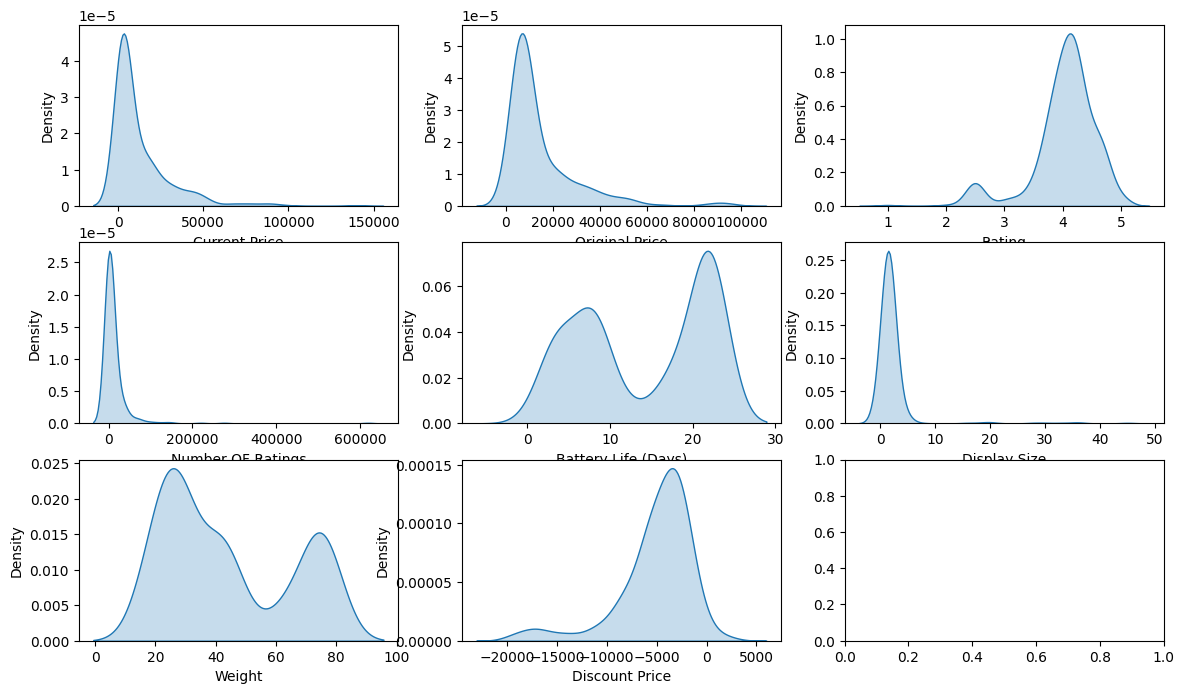

In [288]:
fig , axes = plt.subplots(nrows=3, ncols=3, figsize=(14,8))

for i, colum in enumerate(numerical_col):
    row = i//3
    col = i%3
    ax= axes[row, col]
    sns.kdeplot(data=train_df[colum], ax=ax ,fill=True)
    
plt.show()

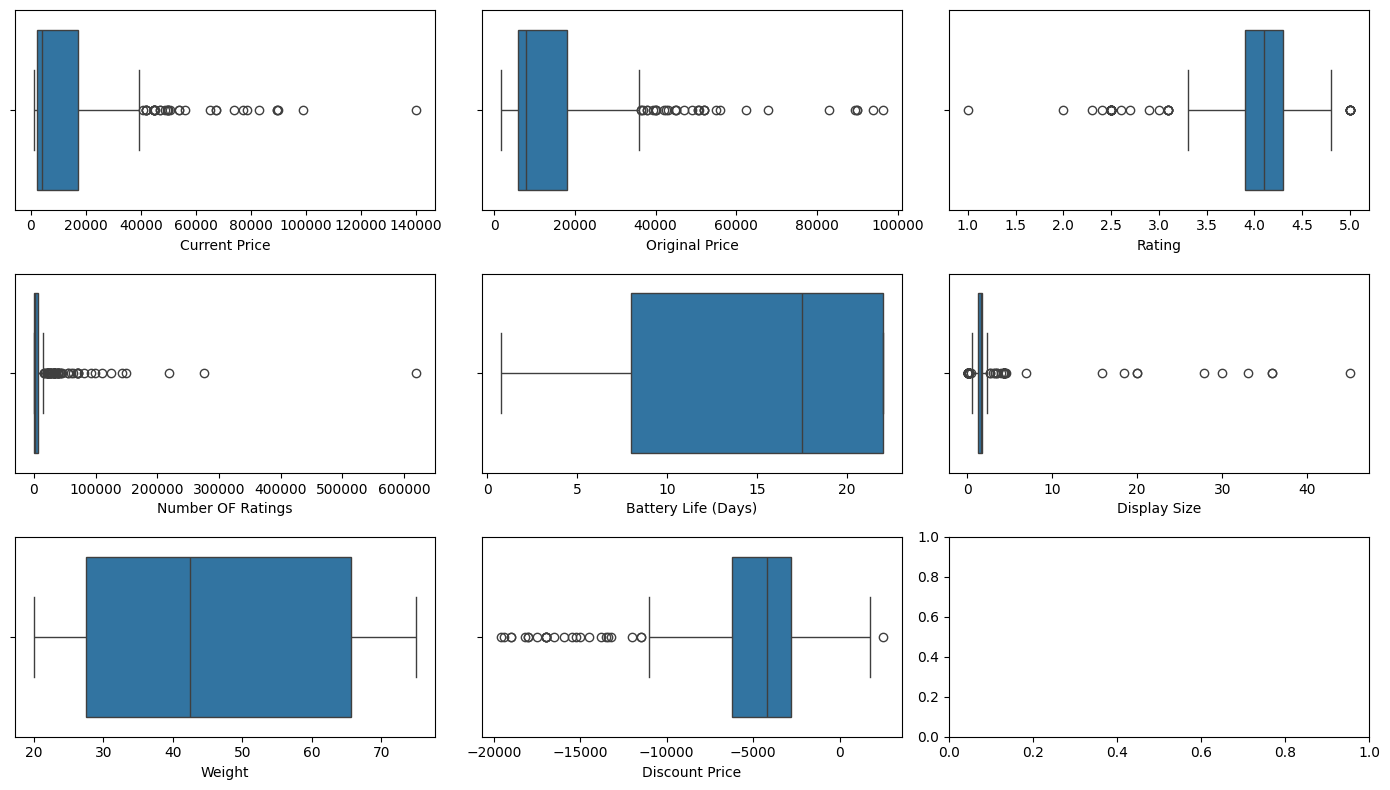

In [289]:
fig , axes = plt.subplots(nrows=3, ncols=3, figsize=(14,8))

for i, colum in enumerate(numerical_col):
    row = i//3
    col = i%3
    ax= axes[row, col]
    sns.boxplot(x=train_df[colum], ax=ax)
    
fig.tight_layout()    
plt.show()

In [290]:
def remove_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    

In [291]:
train_df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [292]:
import_col= ['Current Price', 'Original Price', 'Rating','Number OF Ratings','Display Size']

In [293]:
for col in import_col:
    train_df=remove_outliers_IQR(train_df, col)

In [294]:
for col in numerical_col:
    print(col)
    train_df[col].fillna(train_df[col].median(), inplace=True)

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


C:\Users\menur\AppData\Local\Temp\ipykernel_18172\1658619530.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)
C:\Users\menur\AppData\Local\Temp\ipykernel_18172\1658619530.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [295]:
train_df.shape

(181, 15)

In [296]:
train_df.isna().sum()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [297]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,-3400.000000
5,1499.0,3999.0,4.0,32704.0,8.0,1.7,42.5,-2500.000000


In [298]:
from sklearn.preprocessing import MinMaxScaler

In [299]:
scaler = MinMaxScaler()

In [300]:
data= scaler.fit_transform(train_df[numerical_col[:-1]])

In [301]:
data

array([[0.1116311 , 0.56836451, 0.83333333, ..., 0.12941176, 0.61538462,
        0.77272727],
       [0.03434803, 0.22996018, 0.41666667, ..., 0.34117647, 0.53846154,
        0.40909091],
       [0.02576102, 0.68105326, 0.83333333, ..., 0.12941176, 0.61538462,
        1.        ],
       ...,
       [0.02996866, 0.00116445, 0.        , ..., 1.        , 1.        ,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091]])

In [302]:
data= pd.DataFrame(data, columns= numerical_col[:-1])

In [303]:
data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091


In [304]:
data.shape, train_df.shape

((181, 7), (181, 15))

In [305]:
data.isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
dtype: int64

In [306]:
train_df.drop(numerical_col[:-1], axis=1, inplace=True )

In [307]:
train_df= pd.concat([train_df,data], axis=1)

In [308]:
train_df.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
1,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes,-13200.000001,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091
2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes,-5991.000000,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000
3,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes,-18200.000000,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091
4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes,-3400.000000,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091
5,noise,NSW-05,NaN,NaN,Other,Yes,Yes,-2500.000000,0.034348,0.117609,0.666667,0.030378,0.552941,0.307692,0.409091


In [309]:
train_df.shape

(276, 15)

### Categorical Columns

In [310]:
categorical_col= [feature for feature in train_df.columns if train_df[feature].dtype=='object']

In [311]:
categorical_col

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [312]:
train_df[categorical_col].head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth
1,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes
2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes
3,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes
4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes
5,noise,NSW-05,NaN,NaN,Other,Yes,Yes


In [313]:
train_df[categorical_col].isna().sum()

Brand              95
Model Name        104
Dial Shape        160
Strap Color       160
Strap Material    121
Touchscreen       101
Bluetooth          95
dtype: int64